*The code snippet assumes Anaconda 5.2.0 version of Python virtual environment*

<div class="alert alert-info">
    <h4>Acknowledgement</h4>
    <p>Some materials on this post are from <a href="http://web.stanford.edu/class/cs224n/">CS224n: Natural Language Processing with Deep Learning</a> at the Stanford University.</p>
    <p>Check out the YouTube Lecture on <a href="https://www.youtube.com/watch?v=kEMJRjEdNzM&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&index=2">Word Vectors and Word Senses</a> taught by <a href="https://nlp.stanford.edu/~manning/">Dr. Chris Manning</a>.</p>
</div>

One of the critical components in Natural Langauge Processing (NLP) is to encode text information in a numerical format that can be fed into an NLP model. Such technique, representing words in a numerical vector space, is called **Vector Space Modeling**. It is often synonymous to *word embedding*. A typical vector space model that haven't went through dimensional reduction has a dimension of $V \times N$, where $V$ is a size of unique vocabulary, and $N$ varies based on the choice of modeling method (Notes: in document-to-word embedding model like TF-IDF, $V$ is a number of documents and and $N$ is a size of unique vocabulary). 

In this context, $V$ is basically a sample data size — the larger the $V$, the bigger the training data set. It is always good to have more training data than the otherwise. Therefore, our prime interest lies within the size of $N$, which affects the multi-dimensionality of a vector space model.

Here is a simple illustration of how words look like in a high dimensional vector space. 

<div class="row give-margin">
    <div class="col"><img src="jupyter_images/similar_matrix.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: simple 10-dimensional word vectors</p></div>
</div>

Consider the two semantically similar words, "Success" and "Achieve". When converted into 10-dimensional word vectors using a vector space model of one's choice (Ex: Word2Vec), each word is a $1 \times 10$ vector where each value in a vector represent the word's position in a 10D space. When projected on this high dimensional vector space, the similarity between words can be quantified by evaluating the similarity between these two word vectors. Observe that the vectors in the illustration above looks similar to each other: positions of non-zero values, and values of each cell. Similar word vectors will put similar words close to each other in a vector space, and as a result, "Success" and "Achieve" will have small Euclidean or Cosine Distance. 

One might experience difficulty in trying to visualize the Euclidean or Cosine distance of the word vectors in a 10D vector space. In fact, you can't visualize anything bigger then 3D. If one attempts to visualize the word vectors in a 2D or 3D space, he will have to represent the word vectors in 2D or 3D space first using dimensional reduction. Let's assume that such dimensional reduction was performed and the word vectors for "Success" and "Achieve" are reduced to 3D vectors. The word vectors will then look like this:

<div class="row give-margin">
    <div class="col"><img src="jupyter_images/word_basic_3d.png"></div>
    <div class="col-12"><p class="image-description">Figure 2: Dimensional-reduced word vectors visualization in 3D</p></div>
</div>

Observe the dissimilarity between two word vectors and their positions within the 3D vector space. This is because 3 dimensions are not enough to capture all relationship among words and as a result fails to maintain the semantic relationship between two similar words, "Success" and "Achieve".

Multi-dimensionality in vector space modeling has great significance because it directly affects the performance of any NLP model. In this post, the concept and effect of multi-dimensionality in NLP will be illustrated using mainly **Co-Occurence Matrix** and some **Word2Vec** models.

## Review on Vector Space Model Techniques

Before we talk about the significance of the size of dimensions ($N$), let us review how text information is transformed into a numerical matrix. Please feel free to skip this part if you are already knowledgable about this topic. 

There are two types of methods for word embedding: *Frequency-Based Methods* and *Prediction-Based Methods*. The below table lists some options we have for each type of embedding method.

<table class="jupyter-markdown-table">
   <thead>
      <tr>
         <th class="text-center">Frequency-Based Methods</th>
         <th class="text-center">Prediction-Based Methods</th>
      </tr>
   </thead>
   <tbody class="table-hover">
      <tr>
         <td class="text-center">Count Vector</td>
         <td class="text-center">Continuous Bag of words</td>
      </tr>
      <tr>
         <td class="text-center">TF-IDF</td>
         <td class="text-center">Doc2Vec</td>
      </tr>       
      <tr>
          <td class="text-center"><b>Co-Occurence Matrix</b></td>
          <td class="text-center"><b>Word2Vec</b></td>
      </tr>
   </tbody>
</table>

Frequency-based methods are pretty straightforward to understand. It counts how many times each word appeared in each document, or how many times each word appeared together with each words. Co-Occurence Matrix is a type of frequency-based methods.

**Co-Occurence Matrix**

The value of $N$ for co-occurence matrix is the size of unique vocabulary. In the other words, co-occurence matrix is a square matrix of size $V \times V$. 

Consider a co-occurence matrix with a fixed window size of $n=1$. Setting window size $n=1$ will tell the model to search adjacent context words that are positioned directly left or right of a center word. The matrix is contructed using the following two input documents:

*Document 1: "all that glitters is not gold"*

*Document 2: "all is well that ends well"*

<table>
    <thead>
        <tr>
            <th>*</th>
            <th>START</th>
            <th>all</th>
            <th>that</th>
            <th>glitters</th>
            <th>is</th>
            <th>not</th>
            <th>gold</th>
            <th>well</th>
            <th>ends</th>
            <th>END</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>START</td>
            <td>0</td>
            <td>2</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>all</td>
            <td>2</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>that</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>glitters</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>is</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>not</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>gold</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>well</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
        </tr>
        <tr>
            <td>ends</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>END</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>0</td>
            <td>1</td>
            <td>1</td>
            <td>0</td>
            <td>0</td>
        </tr>
    </tbody>
</table>
<div class="col-12"><p class="image-description">Table 1: Co-Occurence Matrix</p></div>

<div class="alert alert-info">
    <h4>Notes: START and END tokens</h4>
    <p>In NLP, we often add START and END tokens to represent the beginning and end of sentences, paragraphs or documents. In thise case we imagine START and END tokens encapsulating each document, e.g., "START All that glitters is not gold END", and include these tokens in our co-occurrence counts.</p>
</div>

This co-occurence matrix is essentially a vector space model of $V$-dimensional ($V$ columns) matrix, in which $V = 10$. However, in most NLP tasks, this co-occurence matrix goes through PCA or SVD for dimensional reduction and decomposed into a new $k$-dimensional matrix.

<table>
    <thead>
        <tr>
            <th>*</th>
            <th>$k_{1}$</th>
            <th>$k_{2}$</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>START</td>
            <td>0.705</td>
            <td>0.484</td>
        </tr>
        <tr>
            <td>all</td>
            <td>0.705</td>
            <td>-0.484</td>
        </tr>
        <tr>
            <td>that</td>
            <td>0.654</td>
            <td>-0.783</td>
        </tr>
        <tr>
            <td>glitters</td>
            <td>0.52</td>
            <td>0</td>
        </tr>
        <tr>
            <td>is</td>
            <td>1.027</td>
            <td>0</td>
        </tr>
        <tr>
            <td>not</td>
            <td>0.654</td>
            <td>0.783</td>
        </tr>
        <tr>
            <td>gold</td>
            <td>0.382</td>
            <td>0.656</td>
        </tr>
        <tr>
            <td>well</td>
            <td>0.382</td>
            <td>-0.656</td>
        </tr>
        <tr>
            <td>ends</td>
            <td>1.394</td>
            <td>-1.061</td>
        </tr>
        <tr>
            <td>END</td>
            <td>1.394</td>
            <td>1.061</td>
        </tr>
    </tbody>
</table>
<div class="col-12"><p class="image-description">Table 2: Dimension Reduced Co-Occurence Matrix</p></div>

The original matrix was 10D matrix (10 columns) — this can't be visualized. Humans can understand only up to 3D visualizations. However, dimensional reduction was performed with <code>sklearn.decomposition.TruncatedSVD(n_components=2)</code>, and the output table yielded a new matrix with reduced dimension of $k = 2$. This was because I set <code>n_components = 2</code>. The word vectors can now be visualized in a 2D space.

Further discussions about the choice of <code>n_components</code> and dimensional reduction will be followed in the later section of this post.

<div class="row give-margin-inline-big-plot">
    <div class="col"><img src="jupyter_images/simple_words_3d.png"></div>
    <div class="col-12"><p class="image-description">Figure 3: Dimensional-reduced word vectors visualization in 2D</p></div>
</div>

**Word2Vec**

Contrary to frequency-based methods, prediction-based methods are more difficult to understand. As the name 'prediction' implies, their methodologies are based on predicting context words given a center word (*Word2Vec Skip-Gram:* $P(w_{context} \mid w_{center})$), or a center word given context words (*Continuous Bag of Words:* $P(w_{center} \mid w_{context})$). 

Prediction-based methods use neural network algorithm, which means that we have to worry about the number of neurons (weights) in a network. In Word2Vec model, the model matrix has a dimension of $V \times N$, where $V$ is the size of unique vocabulary and the size of $N$ is the number of neurons in a network.

<div class="row">
    <div class="col-12"><img src="jupyter_images/word2vec_skip-gram.png"></div>
    <div class="col-12"><p class="image-description">Figure 3: Skip-Gram algorithm structure for Word2Vec</p></div>
</div>

During the forward and back propagation process, the weights in *Matrix* $W$ (*Embedding matrix*) of size $V \times N$ and *Matrix* $W'$ (*Context matrix*) of size $N \times V$ are optimized to minimize a loss function. Recall that the number of neurons ($N$) is a hyper-parameter that needs to be empirically optimized. Choosing different values for $N$ will yield different output performances. $N = 300$ is a dimensional parameter known to work well with Word2Vec models. Note that a matrix with a dimension of 300 cannot be visualized. However, the dimension can be reduced down to 2D or 3D using [t-distributed stochastic neighbor embedding (t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), or PCA. For NLP visualization purpose, T-SNE is often preferred over PCA or SVD due to its ability to reduce high dimensions to low dimensions while capturing complex relationships with neighboring wods. More comparison about PCA vs T-SNE will be illustrated later.

<div class="alert alert-info">
    <h4>Notes: Word2Vec algorithm</h4>
    <p>The theory behind Word2Vec skip-gram algorithm maybe complex and difficult to understand for beginners. I encourage you to read the following <a href="https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html">two</a> and <a href="https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285">articles</a> that explain the theory. They do it quite well.</p>
</div>

## Why is Multi-Dimensionality Important?

**First**, high dimensionality leads to high computational cost. This is especially true in the case of co-occurence matrix, in which it has a dimension of $V \times V$, where $V$ is the size of vocabulary in a corpus. The previous example shown in *Table 1* had a corpus size of 12 words, and vocab size of 10 words. In real-life applications, corpus size easily exceeds 10's or 100 GB's. For example, *Gensim*'s pre-trained Word2Vec model trained from Google News had a vocab size of three million ([Github Source](https://github.com/RaRe-Technologies/gensim-data)). If we obtain a co-occurence matrix and feed it into an NLP model without dimensional reduction, we will be training our model with a matrix size of $3M \times 3M$. This is unrealistic. We need to choose an optimal value for reduced dimension $k$ that will best describe the variability of the data while significantly cutting down the computational cost. 

On the other hand, computational cost due to high dimensionality is NOT a big concern with Word2Vec, because the most optimal dimension for Word2Vec are already known to be between 200 - 600 (Note: this doesn't mean that Word2Vec is superior to co-occurence matrix. Each has its own pros and cons). 

It is natural to think that high dimension would lead to higher accuracy, but this happens at the cost of increased computation time. One needs to find a "sweet spot" that optimizes the trade-off between accuracy vs. computation time. The [recent paper](https://arxiv.org/pdf/1812.04224.pdf) submitted in Dec 2018 proposed a deterministic way to compute the optimal number of $k$-dimensions. It's code implementation is available on this [Github repo](https://github.com/ziyin-dl/word-embedding-dimensionality-selection).

**Second**, dimension is a critical parameter in word embedding. Too low dimension leads to underfitting and makes your model not expressive enough to capture all possible word relations. On the other hand, too high dimension results in overfitting. However, in the [recent paper](https://arxiv.org/pdf/1812.04224.pdf), it was discovered that Word2Vec and GloVe models are not sensitive to overfitting. 

<div class="row">
    <div class="col"><img src="jupyter_images/word2vec-dimensionality.png"></div>
    <div class="col-12"><p class="image-description">Figure 4: skip-gram Word2Vec: over-parametrization does not significantly hurt performance</p></div>
</div>

<div class="row">
    <div class="col"><img src="jupyter_images/glove-dimensionality.png"></div>
    <div class="col-12"><p class="image-description">Figure 5:  GloVe: over-parametrization does not significantly hurt performance</p></div>
</div>

The spikes of the skip gram Word2Vec and and GloVe models revealed the existence of the "sweet spot" in which a certain number of dimensions leads to the highest accuracy. The sharp rise in accuracy in the far left zone showed that too low number of dimensions results in underfitting. However, it is interesting to note that the flat right tail of the charts showed that indefinitely increasing the number of dimensions did not really result in overfitting. Often times in neural net applications, too high number of dimensions (neurons) results in overfitting, but in skip-gram Word2Vec and GloVe, this was not the case.

A typical good NLP model trained on a wide variety of corpora has a dimension in the order of hundreds. The famous [Mikolov et al. 2013](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) paper on skip-gram Word2Vec model suggests 300 neurons, and [Rohde et al. ms., 2005](https://pdfs.semanticscholar.org/73e6/351a8fb61afc810a8bb3feaa44c41e5c5d7b.pdf) paper on co-occurence/correlation matrix suggests 600-800 dimensions (columns) as the optimum parameters for vector space modeling.

## Vector Space Modeling: Crude Oil News

<div class="row give-margin-inline-big-plot">
    <div class="col"><img src="jupyter_images/reuters_logo.png" style="margin-top: 1.5rem;"></div>
    <div class="col-12"><p class="image-description">Figure 6: International news organization, Reuters</p></div>
</div>

Enough of theories. Now let's dive into the actual application of vector space modeling with Python code implementation. We will explore multi-dimensionality in NLP task using **Reuters** news articles on **crude oil**.

Take a glance at the overall content of the crude oil articles with the following WordCloud visualizaiton.

<div class="row give-margin-inline-big-plot">
    <div class="col"><img src="jupyter_images/wordcloud.png" style="margin-top: 1.5rem;"></div>
    <div class="col-12"><p class="image-description">Figure 7: WordCloud of crude oil articles</p></div>
</div>

**Imports**

Here is all the imports you need to follow with this tutorial.

In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\EricKim\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


**Sample Data Description**

First, you will have to download the articles. NLTK provides a nice api that allows us to download the digitized articles.

In [3]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\EricKim\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [4]:
data = []
for fileid in reuters.fileids():
    category = reuters.categories(fileid)
    text = reuters.raw(fileid)
    data.append([fileid, category, text])
df_reuters = pd.DataFrame(data, columns=['File ID', 'Category', 'Text'])

In [5]:
df_reuters.head(10)

,File ID,Category,Text
0,test/14826,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...
1,test/14828,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
2,test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
3,test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...
4,test/14833,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...
5,test/14839,[ship],AUSTRALIAN FOREIGN SHIP BAN ENDS BUT NSW PORTS...
6,test/14840,"[coffee, lumber, palm-oil, rubber, veg-oil]",INDONESIAN COMMODITY EXCHANGE MAY EXPAND\n Th...
7,test/14841,"[grain, wheat]",SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE\n...
8,test/14842,[gold],WESTERN MINING TO OPEN NEW GOLD MINE IN AUSTRA...
9,test/14843,[acq],SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERG...


In [6]:
len(df_reuters)

10788

There are a total of 10,788 articles.

To our convinience, the articles are already labeled with their respective categories. This helps us in a case we want to perform further analysis and run supervised learning. But we won't be running any supervised learning in this post. But instead, we will extract only the articles that are in the category of **crude**. In the other words, only the articles that talk about crude oil.

In [7]:
df_crude = df_reuters[df_reuters['Category'].apply(lambda x: 'crude' in x)]
df_crude.head(10)

,File ID,Category,Text
2,test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
123,test/15063,"[acq, crude, earn, pet-chem]",ENERGY/U.S. PETROCHEMICAL INDUSTRY\n Cheap oi...
187,test/15200,[crude],TURKEY CALLS FOR DIALOGUE TO SOLVE DISPUTE\n ...
205,test/15230,[crude],IRAQI TROOPS REPORTED PUSHING BACK IRANIANS\n ...
209,test/15238,"[crude, earn]",UNION TEXAS OIL RESERVES DROPPED IN 1986\n Un...
214,test/15244,[crude],GHANA TO BUY CRUDE OIL FROM IRAN\n Ghana will...
257,test/15322,"[crude, nat-gas]",U.S.SENATE LIFTS SOME BANS ON NATURAL GAS\n T...
266,test/15339,"[crude, gas]","EIA SAYS DISTILLATE STOCKS UNCHANGED, GASOLINE..."
268,test/15344,"[crude, gas]",EIA SAYS DISTILLATE STOCKS UNCHANGED IN WEEK\n...
272,test/15351,"[crude, gas]",RECENT U.S. OIL DEMAND OFF 2.6 PCT FROM YEAR A...


In [8]:
df_crude.shape

(578, 3)

There are 578 articles that talk about crude oil.

### Constructing Co-Occurence Matrix

We will build co-occurence matrix that looks like *Table 1* above. Before we build the matrix, we need to consider **tokenization** and **window size**.

**Tokenization**

*Tokenization* is a process of splitting sentences into separate words. Tokenization usually isn't as simple as splitting senteces based on space bars. It is usually a very complicated process that involves heavy regex manipulation, lemmatization, stemming, and some hard-coding with different rules for different cases. For example, converting 'unchanged' to 'unchange', 'stocks' to 'stock', 'pushing' to 'push', 'is, was, being', to 'be'. Or treating multi-words as one word, such as 'in spite of', 'no matter of', 'Panda Express', 'North America', or 'beat down'. Or dealing with punctuations, such as 'Parskin-disease', 'one-to-one' or 'O'reilly'. And many more.

Tokenization won't be covered in detail in this post, because complex tokenization is not necessary for the purpose of explaining multi-dimensinoality in NLP. However, please do note that you will need advanced tokenization scheme in real-life applications.

On the other hand, NLTK has a convinient package that allows you to check if a word is within the corpora of English. However, this does not remove punctuations. The basic use case looks like this:

<pre>
    <code class="language-python">
        >>> from nltk.corpus import words
        >>> "fine" in words.words()
        True
    </code>
</pre>

We will split the sentences using <code>nltk.corpus.reuters.words()</code>.

In [52]:
def read_corpus(category=''):
    files = reuters.fileids(category)
    return [['START'] + [w.lower() for w in list(reuters.words(f))] + ['END'] for f in files]

In [53]:
corpus_crude = read_corpus(category=['crude'])

In [54]:
pd.DataFrame(corpus_crude).head(10)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,START,japan,to,revise,long,-,term,energy,demand,downwards,...,None,None,None,None,None,None,None,None,None,None
1,START,energy,/,u,.,s,.,petrochemical,industry,cheap,...,.,economy,continues,its,modest,rate,of,growth,.,END
2,START,turkey,calls,for,dialogue,to,solve,dispute,turkey,said,...,None,None,None,None,None,None,None,None,None,None
3,START,iraqi,troops,reported,pushing,back,iranians,iraq,said,today,...,None,None,None,None,None,None,None,None,None,None
4,START,union,texas,oil,reserves,dropped,in,1986,union,texas,...,None,None,None,None,None,None,None,None,None,None
5,START,ghana,to,buy,crude,oil,from,iran,ghana,will,...,None,None,None,None,None,None,None,None,None,None
6,START,u,.,s,.,senate,lifts,some,bans,on,...,None,None,None,None,None,None,None,None,None,None
7,START,eia,says,distillate,stocks,unchanged,",",gasoline,off,200,...,None,None,None,None,None,None,None,None,None,None
8,START,eia,says,distillate,stocks,unchanged,in,week,distillate,fuel,...,None,None,None,None,None,None,None,None,None,None
9,START,recent,u,.,s,.,oil,demand,off,2,...,None,None,None,None,None,None,None,None,None,None


**Choice of Window Size**

On of the critical variable in co-occurence matrix is <code>window_size</code>. The below illustration has a window size of 2.

<div class="row give-margin-inline-big-plot">
    <div class="col"><img src="jupyter_images/window_size.png" style="margin-top: 1.5rem;"></div>
    <div class="col-12"><p class="image-description">Figure 8: Illustration of window size</p></div>
</div>

A typical window size is chosen between 2-10. However, window size may exceed way over 10 in case of special circumstances, such as having too few data. Increasing window size may increase the accuracy of the model, but it comes at the price of computational cost, and sometimes loss in accuracy due to noise. 

The author of this [paper](https://pdfs.semanticscholar.org/73e6/351a8fb61afc810a8bb3feaa44c41e5c5d7b.pdf) claims that he observed decrease in model performance of his co-occurrence matrix when he used high window size with large corpus. However, he observed the opposite when high window size was used with smaller corpus.

<div class="row give-margin-inline-big-plot">
    <div class="col"><img src="jupyter_images/effect_of_window_size.png" style="margin-top: 1.5rem;"></div>
    <div class="col-12"><p class="image-description">Figure 9: Effect of window size and corpus size</p></div>
</div>

**Matrix Construction**

In [55]:
def compute_co_occurrence_matrix(corpus, window_size=4):

    distinct_words = sorted(list(set([word for sentence in corpus for word in sentence])))
    num_words = len(distinct_words)
    word2Ind = {word: index for index, word in enumerate(distinct_words)}
    
    M = np.zeros((num_words, num_words))
    
    for sentence in corpus:
        for i, word in enumerate(sentence):        
            begin = max(i - window_size, 0)
            end   = min(i + window_size, num_words)
            context = sentence[begin: end + 1]
            context.remove(sentence[i])
            
            current_row = word2Ind[word]
            for token in context:
                current_col = word2Ind[token]
                M[current_row, current_col] += 1

    return M, word2Ind

In [56]:
reuters_corpus = read_corpus('crude')
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus, window_size=5)

In [57]:
pd.DataFrame(M_co_occurrence, index=word2Ind_co_occurrence.keys(), columns=word2Ind_co_occurrence.keys()).head(10)

,"""","""(",""",","""...",$,&,',(,),")""",...,zinc,zoete,zollinger,zone,zones,zubedei,zubeidi,zuheir,zulia,zverev
"""",88.0,0.0,1.0,0.0,1.0,2.0,78.0,17.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""(",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
""",",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&,2.0,0.0,0.0,0.0,0.0,12.0,31.0,8.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
',78.0,0.0,0.0,0.0,0.0,31.0,22.0,8.0,5.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
(,17.0,0.0,0.0,0.0,0.0,8.0,8.0,6.0,220.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
),7.0,1.0,0.0,0.0,0.0,4.0,5.0,220.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
")""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div class="alert alert-info">
    <h4>Notes: Effect of punctuatoins</h4>
    <p>Be cautious when dealing with punctuations. Although the effect of punctuations in NLP is beyond the scope of this post, please note that punctuations often have their own roles to play in NLP applications. Ex: Parkinson-disease vs Parkinson's disease. Sometimes they may be simply removed, and sometimes they shouldn't be.</p>
</div>

## Dimensional Reduction

Dimensional reduction is necessary in most of the machine learning problems. It is used to reduce computational cost of optimization model, and to mitigate the issue of correlated features. For example, column 1 and column 2 are independent, but column 2, 3 and 4 may be correlated with one another by some relationship like:

$$col_2  = log{(col_3 + col_4 ) / 2}$$

This kind of correlationship may not be visible to an engineer, and may cause problems when left unmitigated.

Dimensional reduction is especially necessary in the case of co-occurence matrix due to the size of the matrix, as it was mentioned <a href="#Why-is-Multi-Dimensionality-Important?">above</a>. Recall that co-occurence matrix has a dimension of $V \times V$, where $V$ is the size of unique vocabulary. Often times vocabulary size easily exceeds tens of thousand, and it is unrealistic to run a machine learning model on such a matrix due to time constraint. 

Moreover, co-occurrence matrix is a very sparse matrix. Take a look at the above Pandas DataFrame of the co-occurrence matrix. You will notice that most of the values are zero, which doesn't add much value to the matrix. Dimensional reduction will make the matrix more compact to convey "most" of the "useful" information.

[sklearn.decomposition.TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) will be used for dimensional reduction. 

<div class="alert alert-info">
    <h4>Notes: Two algorithms of TruncatedSVD</h4>
    <p><b>TruncatedSVD</b> has two options of algorithms. <i>"arpack"</i> and <i>"randomized"</i>. <i>"arpack"</i> has an algorithm complexity of $O(m \times n \times k)$, and <i>"randomized"</i> has $O(m \times n \times log(k))$. In theory, <i>"arpack"</i> is supposed to be better in terms of accuracy, but <i>"randomized"</i> is much faster by an order of magnitude, and claimed to be as nearly accurate as <i>"arpack"</i>. The default of Scipy implementation is <i>"randomized"</i>.</p>
</div>

In [15]:
def reduce_to_k_dim(M, n_components=2):
    
    svd = TruncatedSVD(n_components=n_components, n_iter=10, random_state=42)
    M_reduced = svd.fit_transform(M_co_occurrence)  
    
    print('n_components =', n_components)
    print('Explained Variance =', round(svd.explained_variance_ratio_.sum(), 3))
    
    return M_reduced

In [16]:
reuters_corpus = read_corpus('crude')
M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus, window_size=5)
M_reduced_2 = reduce_to_k_dim(M_co_occurrence, n_components=2)

n_components = 2
Explained Variance = 0.906


In [17]:
pd.DataFrame(M_reduced_2, columns=['$k_{1}$', '$k_{2}$']).head(10)

,$k_{1}$,$k_{2}$
0,861.598711,-92.837976
1,1.523025,-0.235919
2,0.299002,0.054687
3,0.895219,-0.383224
4,1.626508,-0.125964
5,158.617460,-26.523809
6,975.388537,250.237303
7,211.345647,30.294191
8,162.468186,-12.582009
9,1.272724,-0.197958


The original $8185 \times 8185$ co-occurence matrix was reduced into 2-dimensional matrix of $8185 \times 2$, using dimensional reduction with <code>n_components=2</code>. According to the <code>explained_variance_ratio_</code>, the new reduced matrix captures 90.6% variability of the original data with <code>window_size=5</code>. This may not be satisfactory, but good enough to obtain a reasonable word vector visualizaiton on a 2D space. 

We can also try different values of <code>n_components</code>.

In [18]:
M_reduced_3 = reduce_to_k_dim(M_co_occurrence, n_components=3)

n_components = 3
Explained Variance = 0.923


In [19]:
M_reduced_10 = reduce_to_k_dim(M_co_occurrence, n_components=10)

n_components = 10
Explained Variance = 0.972


In [20]:
M_reduced_50 = reduce_to_k_dim(M_co_occurrence, n_components=50)

n_components = 50
Explained Variance = 0.993


In [21]:
M_reduced_100 = reduce_to_k_dim(M_co_occurrence, n_components=100)

n_components = 100
Explained Variance = 0.996


<div class="alert alert-info">
    <h4>Notes: <code>explained_variance_ratio_</code></h4>
    <p>Performing dimensional reduction inevitably results in loss of some data in the original matrix. It is a natural phenomenon considering how we are reducing $8185 \times 8185$ matrix all the way down to $8185 \times 2$ matrix. We can quantify the loss in data using <code>explained_variance_ratio_</code>. I won't cover the details of this property, but long story short, it's good if <code>explained_variance_ratio_</code> is close to 100%. Reducing the matrix to high $k$-dimension will result in smaller loss of data at the cost of high computational load, and vice versa.</p>
    <p>If you are interested in learning a deterministic way to decide the optimal value of $k$, take a look at this <a href="https://arxiv.org/pdf/1812.04224.pdf">paper</a>.</p>
</div>

## Word Vectors Visualization

The original word vector had 8185-dimension, but now its reduced down to 2-dimension and 3-dimension, which can be visualized on a 2D and 3D plane.

**Normalization**

Rescaling (normalization) needs to be done on rows to make each of them unit-length. Skipping this step will result in your visualization looking unbalanced.

In [23]:
# normalize

M_lengths_2 = np.linalg.norm(M_reduced_2, axis=1)
M_normalized_2 = M_reduced_2 / M_lengths_2[:, np.newaxis]

M_lengths_3 = np.linalg.norm(M_reduced_3, axis=1)
M_normalized_3 = M_reduced_3 / M_lengths_3[:, np.newaxis]

**Visualization**

In [24]:
# Axes3D needs to be imported in case of plotting 3D visualizations

from mpl_toolkits.mplot3d import Axes3D

In [25]:
def plot_embeddings(M_reduced, word2Ind, words, ax):
    
    dimension = M_reduced.shape[1]
    
    assert(dimension == 3 or dimension == 2)
    
    for i, word in enumerate(words):
        index = word2Ind[word]
        embedding = M_reduced[index]
        
        if dimension == 3:            
            x, y, z = embedding[0], embedding[1], embedding[2]
            ax.scatter(x, y, z, color='red')
            ax.text(x, y, z, word)
        else:
            x, y = embedding[0], embedding[1]
            ax.scatter(x, y, marker='x', color='red')
            ax.text(x, y,  word)   
    return fig, ax

**Choice of words to visualize**

Recall that there are 8185 unique vocabulary in our data. Visualizing all of them on a plot will won't be very informative, because readers won't be able to distinguish between words because they are too densely plotted.

In [26]:
# choose words to visualize 

words = ['bank', 'barrels', 'bpd', 'ecuador', 'energy', 'industry', 'oil', 'petroleum', 'output', 'produce', 'occidental',
         'mobil', 'exxon', 'electricity' ,'kilowatt', 'china', 'paris', 'saudi', 'norway', 'blockading', 'expert', 'yen', 
         'kuwaiti', 'kuwait', 'persian', 'eia',  'gulf', 'bp', 'uk', 'gas', 'europe', 'allocated', 'lacks', 'militarily', 
         'discouraged', 'violations', 'possibly']

<IPython.core.display.Javascript object>


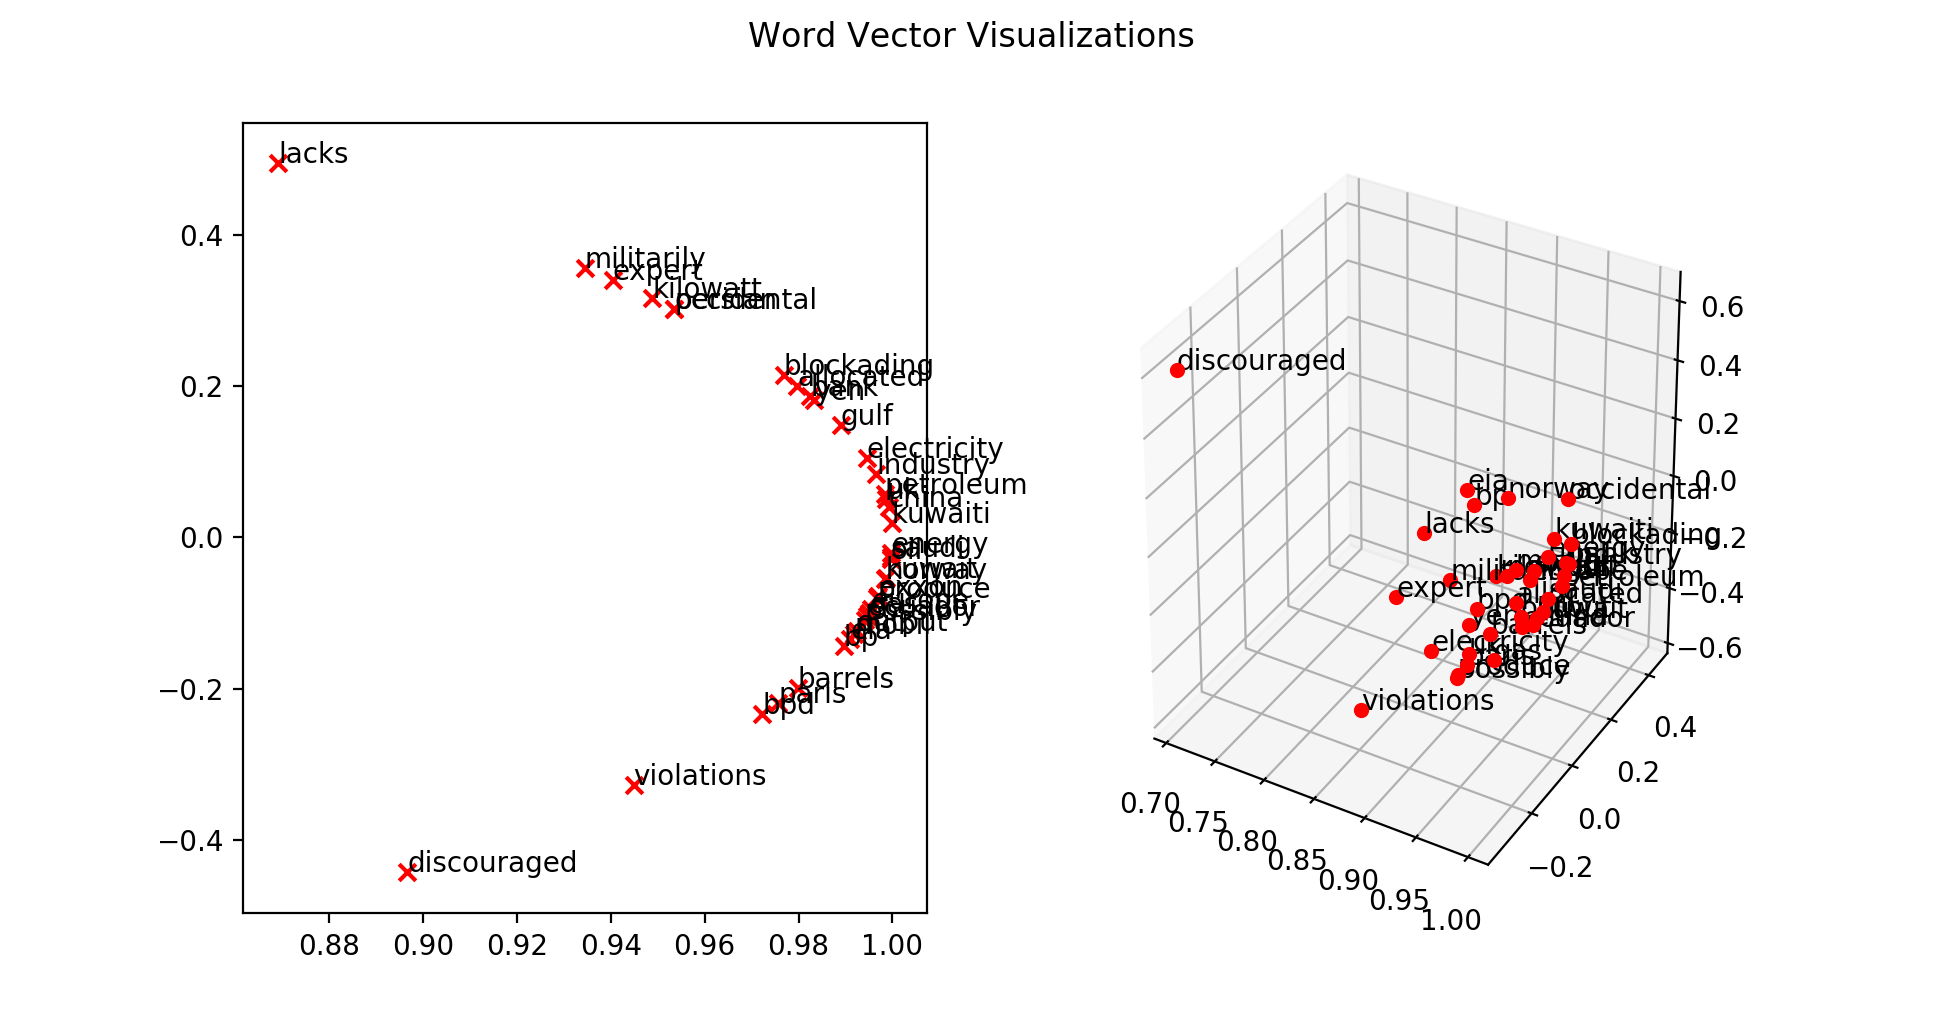

In [27]:
fig = plt.figure()
fig.suptitle('Word Vector Visualizations')

# First subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1 = plot_embeddings(M_normalized_2, word2Ind_co_occurrence, words, ax1)


# Second subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2 = plot_embeddings(M_normalized_3, word2Ind_co_occurrence, words, ax2)

## Dimensionality Analysis on Visualizations

3D visualizations can be viewed from different angles. What will they look like in different angles? Let's take a look.

<div class="row give-margin-inline-big-plot" style="width: 100%">
    <div class="col-md-6 col-sm-12">
        <div class="col"><img src="jupyter_images/3d_wordvec_1.png"></div>
        <div class="col-12"><p class="image-description">Figure 10: 3D plot - angle 1</p></div>
    </div>
    <div class="col-md-6 col-sm-12">
        <div class="col"><img src="jupyter_images/3d_wordvec_2.png"></div>
        <div class="col-12"><p class="image-description">Figure 11: 3D plot - angle 2</p></div>
    </div>
</div>

<div class="row give-margin-inline-plot">
    <div class="col-12"><img src="jupyter_images/3d_wordvec_3.png"></div>
    <div class="col-12"><p class="image-description">Figure 12: 3D plot - angle 3</p></div>
</div>

<u>Interesting Observations:</u>

**First**, when viewed from a certain angle, the 3D plot looks exactly like the 2D plot. However, different patterns can be observed when viewed from a different angle.

**Second**, the distance of *"violations"* and *"discouraged"* are different. They are close to each other on *Figure 10*, but far away from each other on *Figure 11 & 12*.

**Third**, similar pattern was found between *"kilowatt"* and *"electricity"*. As you know, *"kilowatt"* is an unit of *"electricity"*. That is why they are close on *Figure 11 & 12*, but are separated in *Figure 10*. Observe how *"electricity"* is close, but *"kilowatt"* is not to the cluster of oil-producing entities in *Figure 10*. A possible explanation is that *"electricity"* is not oil, but similar to oil in a sense that it is a "type" of energy consumed. On the other hand, although *"kilowatt"* is a unit of energy, but it is not a type of energy.

**Fourth**, *"barrels"* and "*bpd*" are always close to one another. They seem very close on all three plots shown above, and indeed they look close on other angles as well. Due to time and space constraint, I can't take a screenshot of every possible angles and put it here, but I observed that they are always close on any angles. This makes sense, considering *"bpd"* stands for "barrels per day".

**Fifth**, *"paris"* was group together with *"barrels"* and *"bpd"*. They have nothing in common, and yet they were grouped together. The model failed to project *"paris"* on a right vector space.

**Sixth**, the co-occurrence vector space model was able to capture the cluster of oil producers. *"occidental"* is for Occidental Petroleum Corporation (or Oxy), and *"exxon"* is for Exxon Mobil, the two major oil-producing companies in the US. And *"gulf"* for the Gulf of Mexico, one of the biggest offshore oil-producing region in the world. 

**Seventh**, *"eia"* was not inside the cluster of oil producers in most of the angles. This is noteworthy because EIA (U.S. Energy Information Administration) provides energy statistics, such as oil & gas production, consumption, export and export rate. However, it is not a "producing" entity. The model was able to differentiate between an entity who "talks" about the oil-production, and the entities who actually "produce" oil.

**Eighth**, the model was not able to differentiate nations (Kuwait, Norway, China, UK) from the other entities. A well trained Word2Vec model with 300-dimensions is able to distinguish among nations, cities, and companies, but this one couldn't.

<div class="alert alert-info">
    <h4>Warning!</h4>
    <p><a href="#Why-is-Multi-Dimensionality-Important?">Previously</a> I said that a good co-occurrence matrix model has a dimension of 600-800. However, the <code>explained_variance_ratio_</code> was 92.3%, which is reasonably good, and the 3D visualizations seemed to capture the relationship among words pretty well. This happend because:</p>
    <p>1. the purpose of this post was to explain dimensionality</p>
    <p>If you attempt to feed the co-occurrence matrix of 3-dimensions into a machine learning model, it will NOT perform well. It "seems" to work well because it was used only for visualizations.</p>
    <p>2. the data had limited scope of topics: crude oil</p>
    <p>Having limited scope of topics really simplfies the complexity of problem. If the training data had all sorts of articles (Ex: toiles, water bottles, nuclear, desk, paper, insects, milk, gas, school, trash), this will not work well.</p>
</div> 

## Conclusion

It is known that a well trained Word2Vec model has 300 dimensions. Think of each dimension in Word2Vec vector space as an entity that represents word relationships: man vs woman, objects vs living, humans vs animals, nation vs city, drink vs food, action vs concept, and many more. Assume that that there are 300 of these kinds of relationships among all words in this world, represented by a single dimension per relationship.

The 3D visualization from the co-occurrence matrix model was able to capture the cluster of oil-producing entities (**Sixth** observation). But it wasn't able to differentiate between nations and companies, because it simply didn't have a dimension that captures that kind of relationship (**Eighth** observation). 

In *Figure 10*, the model sensed the negative feelings that *"discouraged"* and *"violations"* conveyed, and put them in a close vector space (**Second** observation). But when viewed from a different angle, or to put it better, viewed from a different dimension, the model put them far apart because they do not convey similar meanings (*Figure 11 & 12*).

On the other hand, the model completely failed to distinguish between *"paris"* vs *"barrels"* + *"bpd"* (**Fifth** observation). Recall that our <code>explained_variance_ratio_</code> for 3-dimension was 92.3% <a href="#Dimensional-Reduction">above</a>. Some information about *"paris"* could've been lost during dimensional reduction and that might have caused the error in word vector projection on a 3D vector space. Or, we simply did not have sufficient training data.

Having more dimensions allows a model to capture more complex relationships among words, and that's precisly why Google's Word2Vec model had 300 dimensions. 